# <center>TCGA-LUAD</center>

## Abstract 

## Main Code

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# models tried
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import Perceptron

In [2]:
# Opening the dataset
df = pd.read_table("processed_squamous.txt", sep=" ")
y = df.label
X = df.drop('label', axis=1) #iloc[:,list(range(df.shape[1]-1))]
# features in columns and samples in rows.

In [3]:
print(df.shape)
print(X.shape)
print(y.shape)
y.describe()

(551, 917)
(551, 916)
(551,)


count       551
unique        2
top       tumor
freq        502
Name: label, dtype: object

In [4]:
print(X.columns)

Index(['AADACL2-AS1', 'ABCA4', 'ABCB4', 'ABCB5', 'ABCC2', 'ACSL6', 'ACTL8',
       'ADAMTS3', 'ADAMTS6', 'ADAMTS8',
       ...
       'ZDHHC11', 'ZFHX4-AS1', 'ZNF253', 'ZNF423', 'ZNF521', 'ZNF536',
       'ZNF560', 'ZNF728', 'ZNF804A', 'ZNF831'],
      dtype='object', length=916)


In [5]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(330, 916)
(330,)
(221, 916)
(221,)


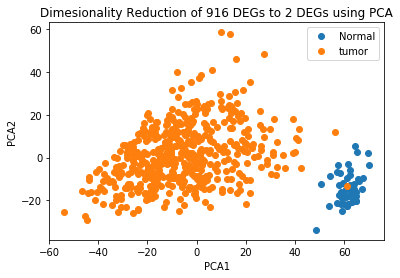

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:,0],X_pca[:,1])

df2 = pd.DataFrame(dict(x=X_pca[:,0], y=X_pca[:,1], label=y))

groups = df2.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
ax.legend()
plt.title('Dimesionality Reduction of 916 DEGs to 2 DEGs using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()

In [7]:
def try_model(model):
    clf_model = model
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
#     print('Model:', str(model).split('(')[0])
#     print('Model parameters:', str(model))
#     print('confusion matrix', confusion_matrix(y_test,y_pred), sep='\n')
#     print(classification_report(y_test,y_pred))
#     print('accuracy score =', accuracy_score(y_test,y_pred))
#     print()
    return (str(model).split('(')[0], accuracy_score(y_test,y_pred))

### Model #1: SVM

In [8]:
# SVM model (building the model [Linear])
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
# testing the model
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 25   0]
 [  2 194]]
              precision    recall  f1-score   support

      Normal       0.93      1.00      0.96        25
       tumor       1.00      0.99      0.99       196

    accuracy                           0.99       221
   macro avg       0.96      0.99      0.98       221
weighted avg       0.99      0.99      0.99       221

0.9909502262443439


In [9]:
# GridSearch
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
# {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = GridSearchCV(svclassifier, parameters)
grid.fit(X_train, y_train)
print(grid.best_params_)
print()
print(grid.best_estimator_) 
y_pred_2 = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))
print(accuracy_score(y_test,y_pred_2))

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[ 25   0]
 [  2 194]]
              precision    recall  f1-score   support

      Normal       0.93      1.00      0.96        25
       tumor       1.00      0.99      0.99       196

    accuracy                           0.99       221
   macro avg       0.96      0.99      0.98       221
weighted avg       0.99      0.99      0.99       221

0.9909502262443439


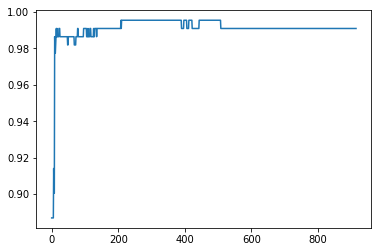

In [10]:
# No. of features vs. accuracy
acc_list = []
for i in range(1, df.shape[1]-1):
    X = df.iloc[:,list(range(i))]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(acc_list)
plt.show()

### Model #2: Linear Discriminant Analysis

In [11]:
param = {'solver' : ['svd','lsqr']}
lda = LinearDiscriminantAnalysis()

# building a basic model
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()


# performing grid search analysis of the model
grid = GridSearchCV(lda, param)
grid.fit(X_train, y_train)
print(grid.best_params_)
print()
print(grid.best_estimator_) 
y_pred_2 = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))
print(accuracy_score(y_test,y_pred_2))


[[ 25   0]
 [  3 193]]
              precision    recall  f1-score   support

      Normal       0.89      1.00      0.94        25
       tumor       1.00      0.98      0.99       196

    accuracy                           0.99       221
   macro avg       0.95      0.99      0.97       221
weighted avg       0.99      0.99      0.99       221

0.9864253393665159

{'solver': 'svd'}

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
[[ 25   0]
 [  3 193]]
              precision    recall  f1-score   support

      Normal       0.89      1.00      0.94        25
       tumor       1.00      0.98      0.99       196

    accuracy                           0.99       221
   macro avg       0.95      0.99      0.97       221
weighted avg       0.99      0.99      0.99       221

0.9864253393665159


### Model #3: Logistic Regression

In [12]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()

[[ 25   0]
 [  2 194]]
              precision    recall  f1-score   support

      Normal       0.93      1.00      0.96        25
       tumor       1.00      0.99      0.99       196

    accuracy                           0.99       221
   macro avg       0.96      0.99      0.98       221
weighted avg       0.99      0.99      0.99       221

0.9909502262443439



### Model #4: Naive Bayes

In [13]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()

[[ 19   6]
 [  0 196]]
              precision    recall  f1-score   support

      Normal       1.00      0.76      0.86        25
       tumor       0.97      1.00      0.98       196

    accuracy                           0.97       221
   macro avg       0.99      0.88      0.92       221
weighted avg       0.97      0.97      0.97       221

0.9728506787330317



In [14]:
try_model(GaussianNB())

('GaussianNB', 0.9728506787330317)

### Model #5: Decision Tree Classifier

In [15]:
try_model(DecisionTreeClassifier())

('DecisionTreeClassifier', 0.9909502262443439)

[[ 25   0]
 [  4 192]]
              precision    recall  f1-score   support

      Normal       0.86      1.00      0.93        25
       tumor       1.00      0.98      0.99       196

    accuracy                           0.98       221
   macro avg       0.93      0.99      0.96       221
weighted avg       0.98      0.98      0.98       221

0.9819004524886877
1



[Text(167.4, 163.07999999999998, 'X[150] <= 13.362\ngini = 0.135\nsamples = 330\nvalue = [24, 306]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 306\nvalue = [0, 306]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]')]

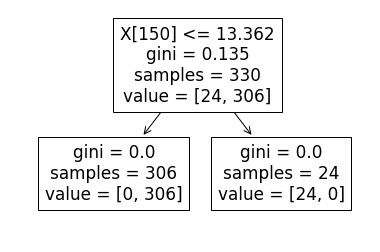

In [16]:
DTC = DecisionTreeClassifier()
dtc = DTC.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(dtc.n_outputs_)
print()
plot_tree(dtc)

In [17]:
nn = np.array(dtc.feature_importances_, dtype=bool)

In [18]:
X.columns[nn]

Index(['CLDN18'], dtype='object')

In [19]:
dtc.get_depth()

1

[[ 24   1]
 [  5 191]]
              precision    recall  f1-score   support

      Normal       0.83      0.96      0.89        25
       tumor       0.99      0.97      0.98       196

    accuracy                           0.97       221
   macro avg       0.91      0.97      0.94       221
weighted avg       0.98      0.97      0.97       221

0.9728506787330317
1



[Text(167.4, 163.07999999999998, 'X[389] <= 12.022\nentropy = 0.376\nsamples = 330\nvalue = [24, 306]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 306\nvalue = [0, 306]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]')]

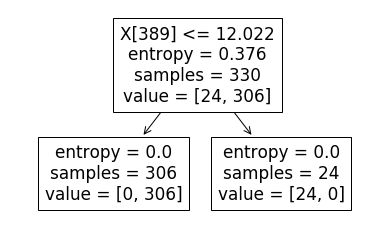

In [25]:
# information gain
DTC2 = DecisionTreeClassifier(criterion='entropy')
dtc2 = DTC2.fit(X_train, y_train)
y_pred = dtc2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(dtc2.n_outputs_)
print()
plot_tree(dtc2)

### Model #6: Perceptron

In [20]:
clf = Perceptron()
clf.fit(X, y)
clf.score(X, y)

0.9981851179673321

In [21]:
try_model(Perceptron())

('Perceptron', 0.9864253393665159)

In [22]:
models = [SVC(kernel='linear'), LinearDiscriminantAnalysis(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), Perceptron()]
model_results = {}
for model in models:
    key, val = try_model(model)
    model_results[key] = val
print(model_results)

{'SVC': 0.9909502262443439, 'LinearDiscriminantAnalysis': 0.9864253393665159, 'LogisticRegression': 0.9909502262443439, 'GaussianNB': 0.9728506787330317, 'DecisionTreeClassifier': 0.9819004524886877, 'Perceptron': 0.9864253393665159}


In [23]:
df2 = pd.DataFrame(list(model_results.values()), list(model_results.keys()))
df2.columns = ["Accuracy"]   
df2

,Accuracy
SVC,0.990950
LinearDiscriminantAnalysis,0.986425
LogisticRegression,0.990950
GaussianNB,0.972851
DecisionTreeClassifier,0.981900
Perceptron,0.986425


## Results and Discussion